In [14]:
import numpy as np # for numerical operations
from moviepy.editor import *
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy import signal
import sys
import noisereduce as nr
import IPython
from moviepy.audio.AudioClip import AudioArrayClip
from moviepy.audio.fx import volumex

np.set_printoptions(threshold=1e5)

SAMPLING_F = 44100
FIG_SIZE = [10, 5]

from moviepy.config import change_settings
#change_settings({"IMAGEMAGICK_BINARY": "/usr/local/bin/convert"})
#change_settings({"FFMPEG_BINARY": "ffmpeg"})

In [15]:
clip = VideoFileClip("/Users/zexuan/Desktop/videos_to_edit/trick_shots/two_balls.mp4")
# Make the text. Many more options are available.
text_clips = []
for i in range(71):
    duration = 0.79
    if i == 0:
        duration = 0.9
    elif i == 70:
        duration = 4
    text_clip = TextClip("COUNT: {}".format(
        str(i)), size=(1920*1.55, 1080*1.7), fontsize=130, color='black', stroke_width=4).set_position(
        ("right", "bottom")).set_duration(duration)
    text_clips.append(text_clip)

count_clip = concatenate_videoclips(text_clips)
result = CompositeVideoClip([clip, count_clip]) # Overlay text on video
result.write_videofile("out.mp4") # Many options...

chunk:   3%|▎         | 33/1291 [00:00<00:05, 236.42it/s, now=None]

Moviepy - Building video out.mp4.
MoviePy - Writing audio in %s



t:   0%|          | 0/1783 [00:00<?, ?it/s, now=None]

MoviePy - Done.
Moviepy - Writing video out.mp4




t:   7%|▋         | 124/1783 [00:19<04:28,  6.17it/s, now=None]


t:  14%|█▍        | 246/1783 [00:37<03:46,  6.77it/s, now=None]


t:  21%|██        | 368/1783 [00:57<03:39,  6.43it/s, now=None]


t:  27%|██▋       | 490/1783 [01:16<03:15,  6.61it/s, now=None]


t:  34%|███▍      | 612/1783 [01:34<02:48,  6.95it/s, now=None]


t:  41%|████      | 734/1783 [01:53<02:52,  6.09it/s, now=None]


t:  48%|████▊     | 856/1783 [02:13<02:16,  6.78it/s, now=None]


t:  55%|█████▍    | 978/1783 [02:34<02:26,  5.48it/s, now=None]


t:  62%|██████▏   | 1098/1783 [02:58<02:23,  4.77it/s, now=None]


t:  68%|██████▊   | 1218/1783 [03:20<01:30,  6.24it/s, now=None]


t:  75%|███████▌  | 1338/1783 [03:38<01:08,  6.45it/s, now=None]


t:  82%|████████▏ | 1458/1783 [03:56<00:48,  6.73it/s, now=None]


t:  89%|████████▊ | 1578/1783 [04:15<00:34,  5.96it/s, now=None]


t:  95%|█████████▌| 1698/1783 [04:34<00:12,  6.57it/s, now=None]


t:   0%|          | 3/1783 [29:11<04:58,  5.96it/s, now=None]   

Moviepy - Done !
Moviepy - video ready out.mp4


In [3]:
clip.audio.subclip(0.3, 0.65).preview()
#clip.audio.subclip(6.6, 7.2).preview()

In [4]:
noisy_part = concatenate_audioclips([clip.audio.subclip(0.3, 0.65), clip.audio.subclip(6.6, 7.2)]).to_soundarray()
#clip.audio.subclip(6.6, 7.2).to_soundarray()
noisy_part_left, noisy_part_right = noisy_part[:, 0], noisy_part[:, 1]
data_part = clip.audio.to_soundarray()
data_part_left, data_part_right = data_part[:, 0], data_part[:, 1]

In [5]:
noise_reduced_left = nr.reduce_noise(audio_clip=data_part_left, noise_clip=noisy_part_left, verbose=False)
noise_reduced_right = nr.reduce_noise(audio_clip=data_part_right, noise_clip=noisy_part_right, verbose=False)

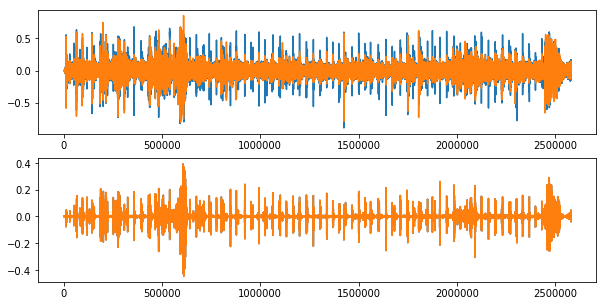

In [6]:
noise_reduced = np.column_stack((noise_reduced_left, noise_reduced_left))
#IPython.display.Audio(data=noise_reduced, rate=clip.audio.fps)
plt.rcParams['figure.figsize'] = FIG_SIZE
fig, axs = plt.subplots(2)
axs[0].plot(data_part)
axs[1].plot(noise_reduced)
plt.show()

In [8]:
audio_stereo = AudioArrayClip(noise_reduced, fps=clip.audio.fps).volumex(2)
audio_stereo.subclip(0,10).preview()

In [12]:
#noise_reduced_reshape = np.reshape(noise_reduced, (-1, 1))
what = result.set_audio(audio_stereo)
what.write_videofile("out_reduced_noise.mp4", remove_temp=False, temp_audiofile="out_reduced_noise.wav")

chunk:   3%|▎         | 33/1291 [00:00<00:04, 256.33it/s, now=None]

Moviepy - Building video out_reduced_noise.mp4.
MoviePy - Writing audio in %s



t:   0%|          | 0/1783 [00:00<?, ?it/s, now=None]

MoviePy - Done.
Moviepy - Writing video out_reduced_noise.mp4




t:   7%|▋         | 124/1783 [00:18<04:37,  5.97it/s, now=None]


t:  14%|█▍        | 246/1783 [00:38<04:04,  6.28it/s, now=None]


t:  21%|██        | 368/1783 [00:59<03:41,  6.38it/s, now=None]


t:  27%|██▋       | 490/1783 [01:17<03:09,  6.83it/s, now=None]


t:  34%|███▍      | 612/1783 [01:37<02:48,  6.95it/s, now=None]


t:  41%|████      | 734/1783 [01:56<02:34,  6.80it/s, now=None]


t:  48%|████▊     | 856/1783 [02:15<02:18,  6.68it/s, now=None]


t:  55%|█████▍    | 978/1783 [02:34<02:03,  6.50it/s, now=None]


t:  62%|██████▏   | 1098/1783 [02:55<02:03,  5.54it/s, now=None]


t:  68%|██████▊   | 1218/1783 [03:15<01:29,  6.28it/s, now=None]


t:  75%|███████▌  | 1338/1783 [03:34<01:09,  6.40it/s, now=None]


t:  82%|████████▏ | 1458/1783 [03:53<00:56,  5.78it/s, now=None]


t:  89%|████████▊ | 1578/1783 [04:12<00:30,  6.74it/s, now=None]


t:  95%|█████████▌| 1698/1783 [04:31<00:12,  6.58it/s, now=None]


t:   0%|          | 3/1783 [13:23<04:58,  5.96it/s, now=None]   

Moviepy - Done !
Moviepy - video ready out_reduced_noise.mp4


In [ ]:
#AudioArrayClip(noise_reduced, fps=clip.audio.fps).subclip(0, 10).preview()
#what.subclip(0,10).preview()